In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.ticker as mticker

In [ ]:
# https://www.kaggle.com/datasets/marwa80/userbehavior?resource=download
data_fn = '../data/taobao/UserBehavior.csv'
headers = ['user_id', 'item_id',  'category_id', 'behavior_type', 'timestamp']
df = pd.read_csv(data_fn, header=None, names=headers)

In [11]:
display(df)

,user_id,item_id,category_id,behavior_type,timestamp
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146
...,...,...,...,...,...
100150802,999999,4797808,11120,pv,1512293403
100150803,999999,4613472,4602841,pv,1512293766
100150804,999999,3647364,2304296,pv,1512293792
100150805,999999,1903801,2304296,pv,1512293827


In [115]:
min_range = np.percentile(df['timestamp'], 0.03)
max_range = np.percentile(df['timestamp'], 1)

bin_minutes = 60
num_bins = int((max_range-min_range) // (bin_minutes * 60))
print(datetime.datetime.utcfromtimestamp(min_range).strftime('%m-%d %H:%M,'), datetime.datetime.utcfromtimestamp(max_range).strftime('%m-%d %H:%M,'), num_bins)

hist, bin_edges = np.histogram(df['timestamp'], density=False, bins=num_bins, range=(min_range, max_range))
times = [datetime.datetime.utcfromtimestamp(timestamp).strftime('%m-%d %H:%M') for timestamp in np.arange(num_bins)*(60*bin_minutes)+min_range]

11-24 12:36, 11-24 23:11, 10


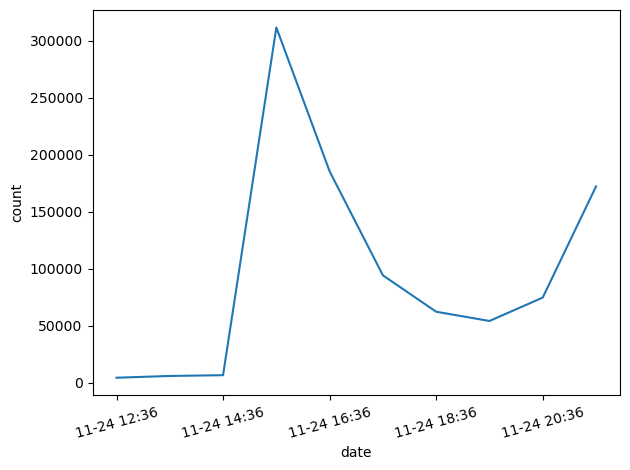

In [113]:
# synthetic data
a = hist
d = times

# make figure + axes
fig, ax = plt.subplots(tight_layout=True)
ax.set_xlabel('date')
ax.set_ylabel('count')

# draw one line
ln1, = ax.plot(hist)


# helper function for the formatter
def listifed_formatter(x, pos=None):
    try:
        return d[int(x)]
    except IndexError:
        return ''

# make and use the formatter
mt = mticker.FuncFormatter(listifed_formatter)
ax.xaxis.set_major_formatter(mt)

# set the default ticker to only put ticks on the integers
loc = ax.xaxis.get_major_locator()
loc.set_params(integer=True)

# rotate the labels
[lab.set_rotation(15) for lab in ax.get_xticklabels()]
plt.show()